# Visualization of inversion - Kimberlite data

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.pyplot as plt
import cPickle as pickle
import os

from fatiando import utils
from fatiando.gravmag import polyprism
from fatiando.gravmag.transform import reduce_to_pole
from fatiando.mesher import PolygonalPrism
from fatiando.vis import mpl, myv
from matplotlib import colors, ticker, cm
from IPython.display import Image as img
from matplotlib.mlab import normpdf

/home/leonardo/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")
/home/leonardo/anaconda2/lib/python2.7/site-packages/fatiando/vis/myv.py:51: UserWarning: This module will be removed in v0.7.
  warnings.warn("This module will be removed in v0.7.")


In [2]:
mypath = 'tfa_inversion/true_direction_flightlines/r800_int1_z050_dz250/'

In [3]:
with open(mypath+'inversion.pickle') as w:
        kimberlite = pickle.load(w)

In [4]:
with open('kimberlite_data/kimberlite_model.pickle') as w:
        kimberlite_model = pickle.load(w)

/home/leonardo/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


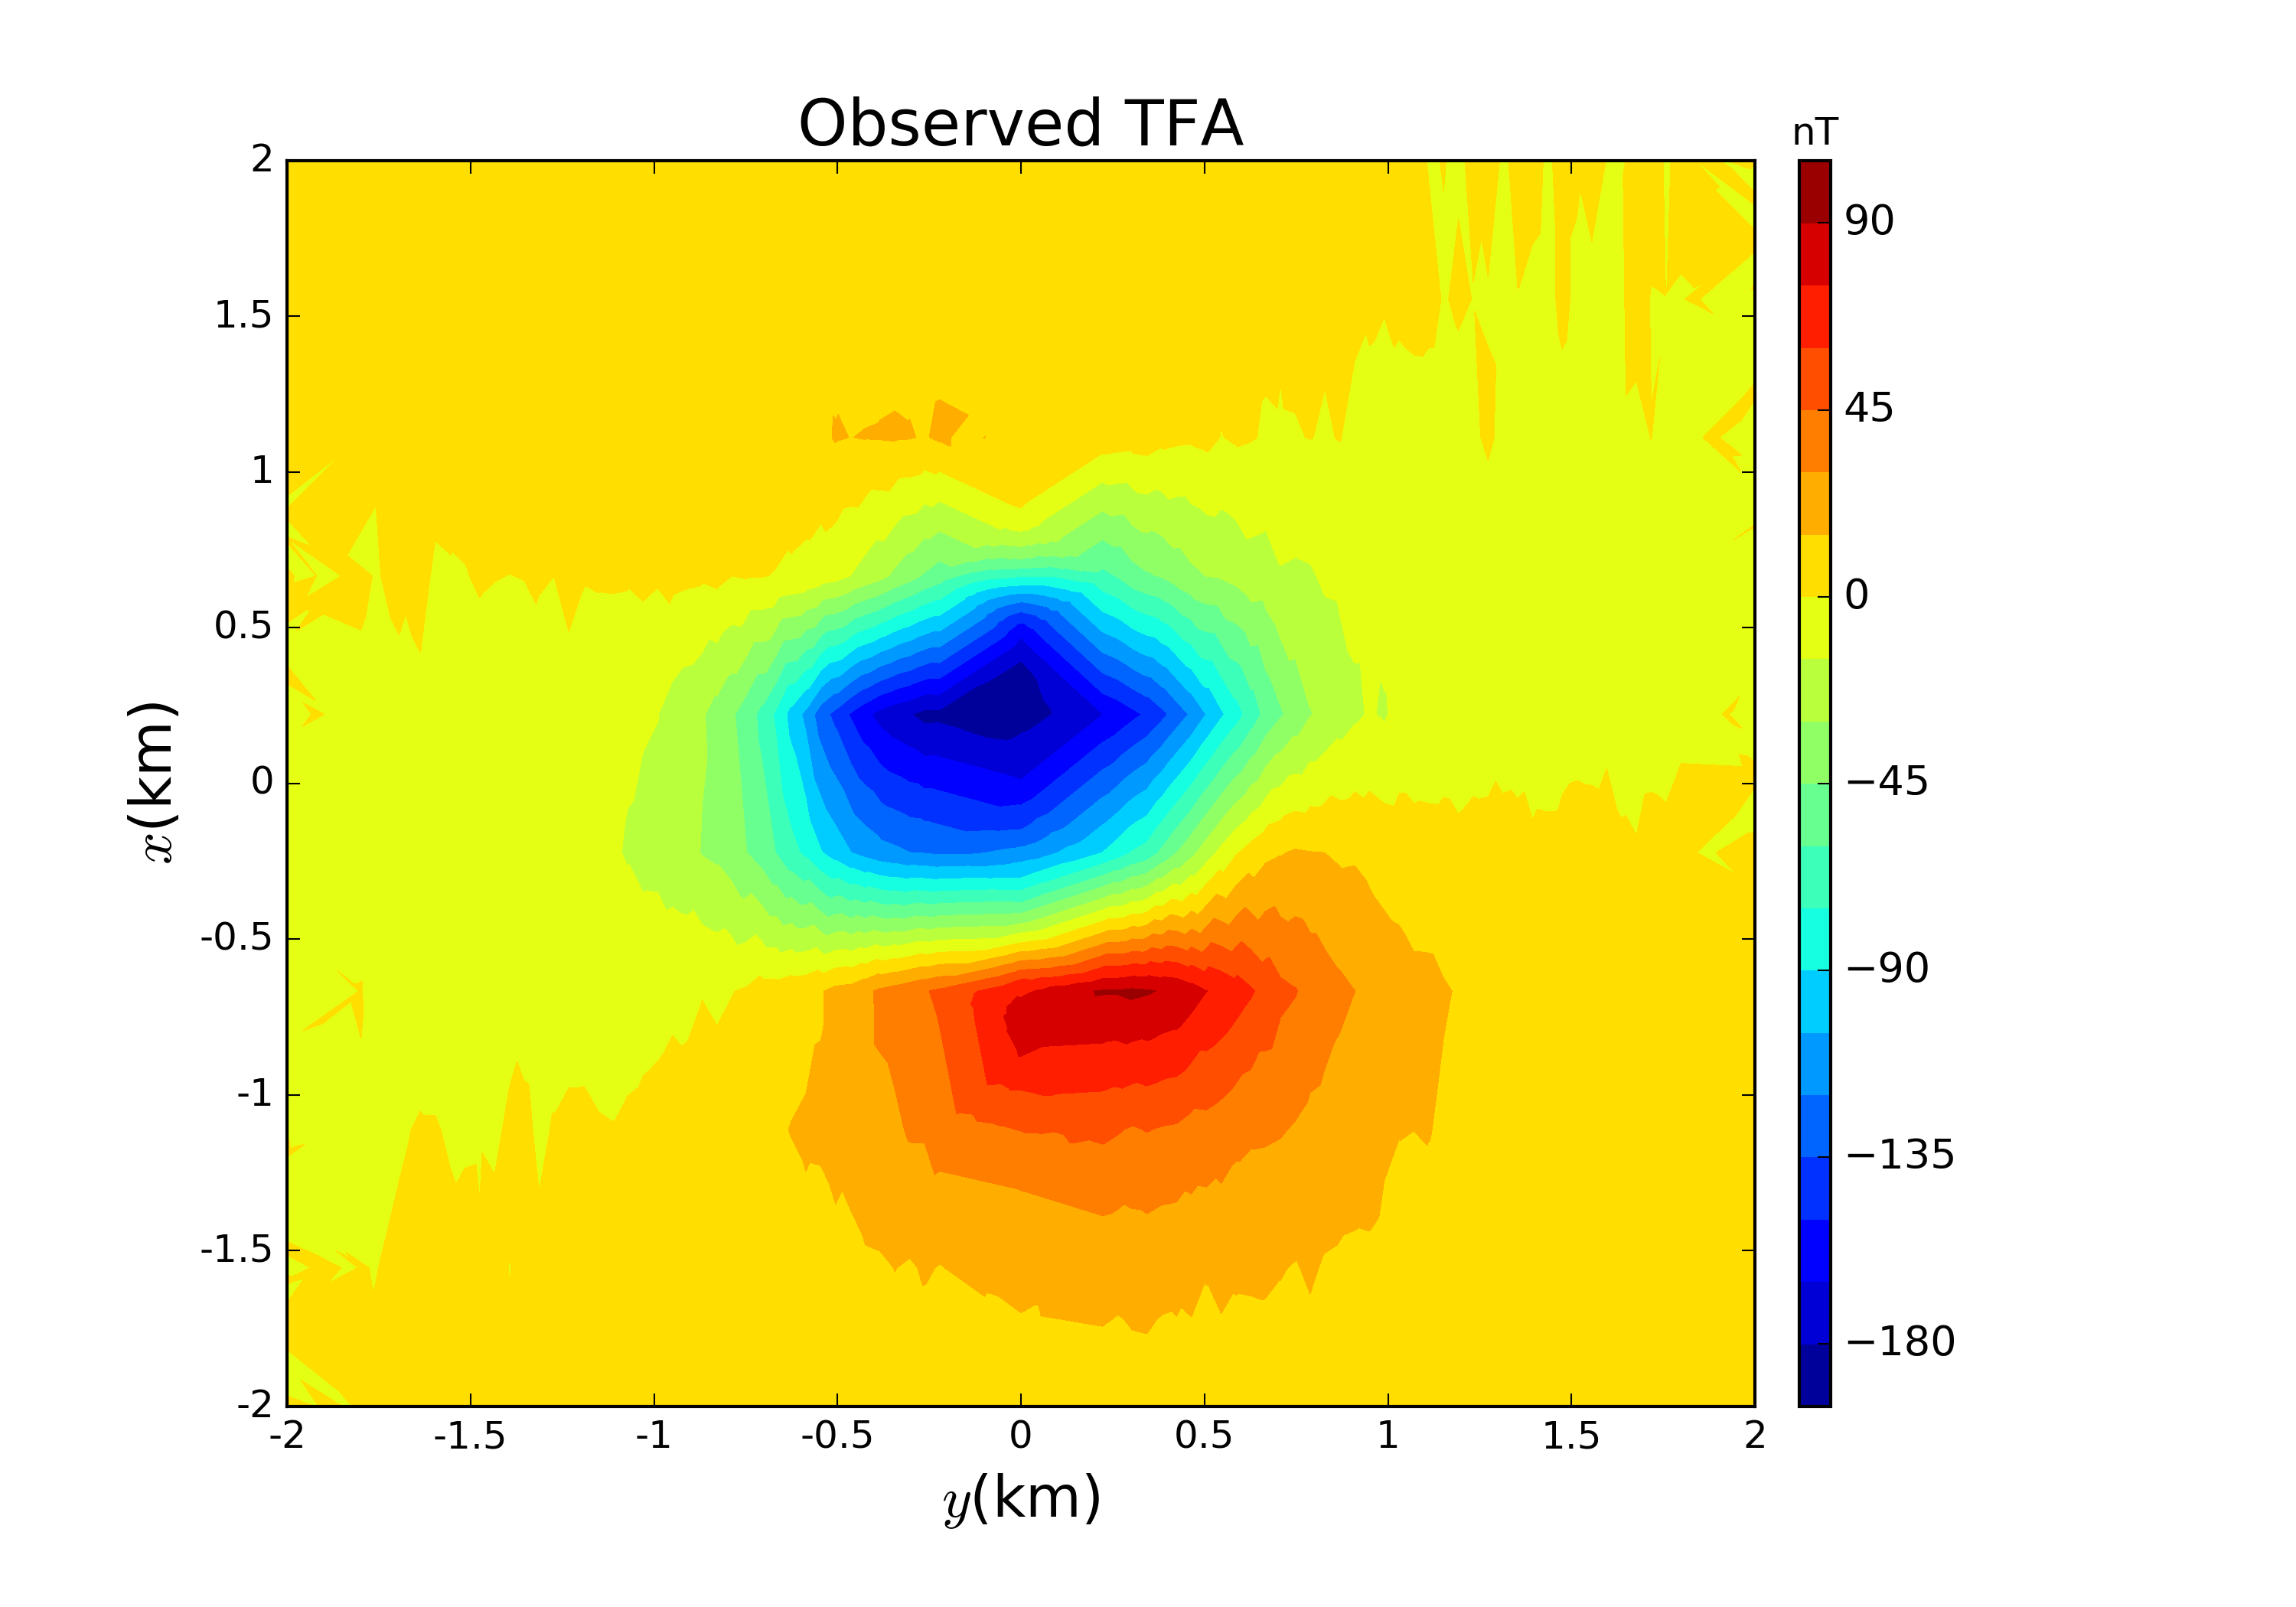

In [5]:
plt.figure(figsize=(10,7))
plt.title('Observed TFA', fontsize=20)
plt.tricontourf(kimberlite['y'], kimberlite['x'], kimberlite['observed_data'], 20, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
#clines = plt.tricontour(yp, xp, dobs, 20, colors='k', linewidths=0.2)
#plt.clabel(clines, fontsize=4, fmt='%3d')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')
plt.savefig(mypath+'kimberlite_real_data.png', dpi=300)
#plt.show()
img(filename=mypath+'kimberlite_real_data.png', width=1000, height=1200)

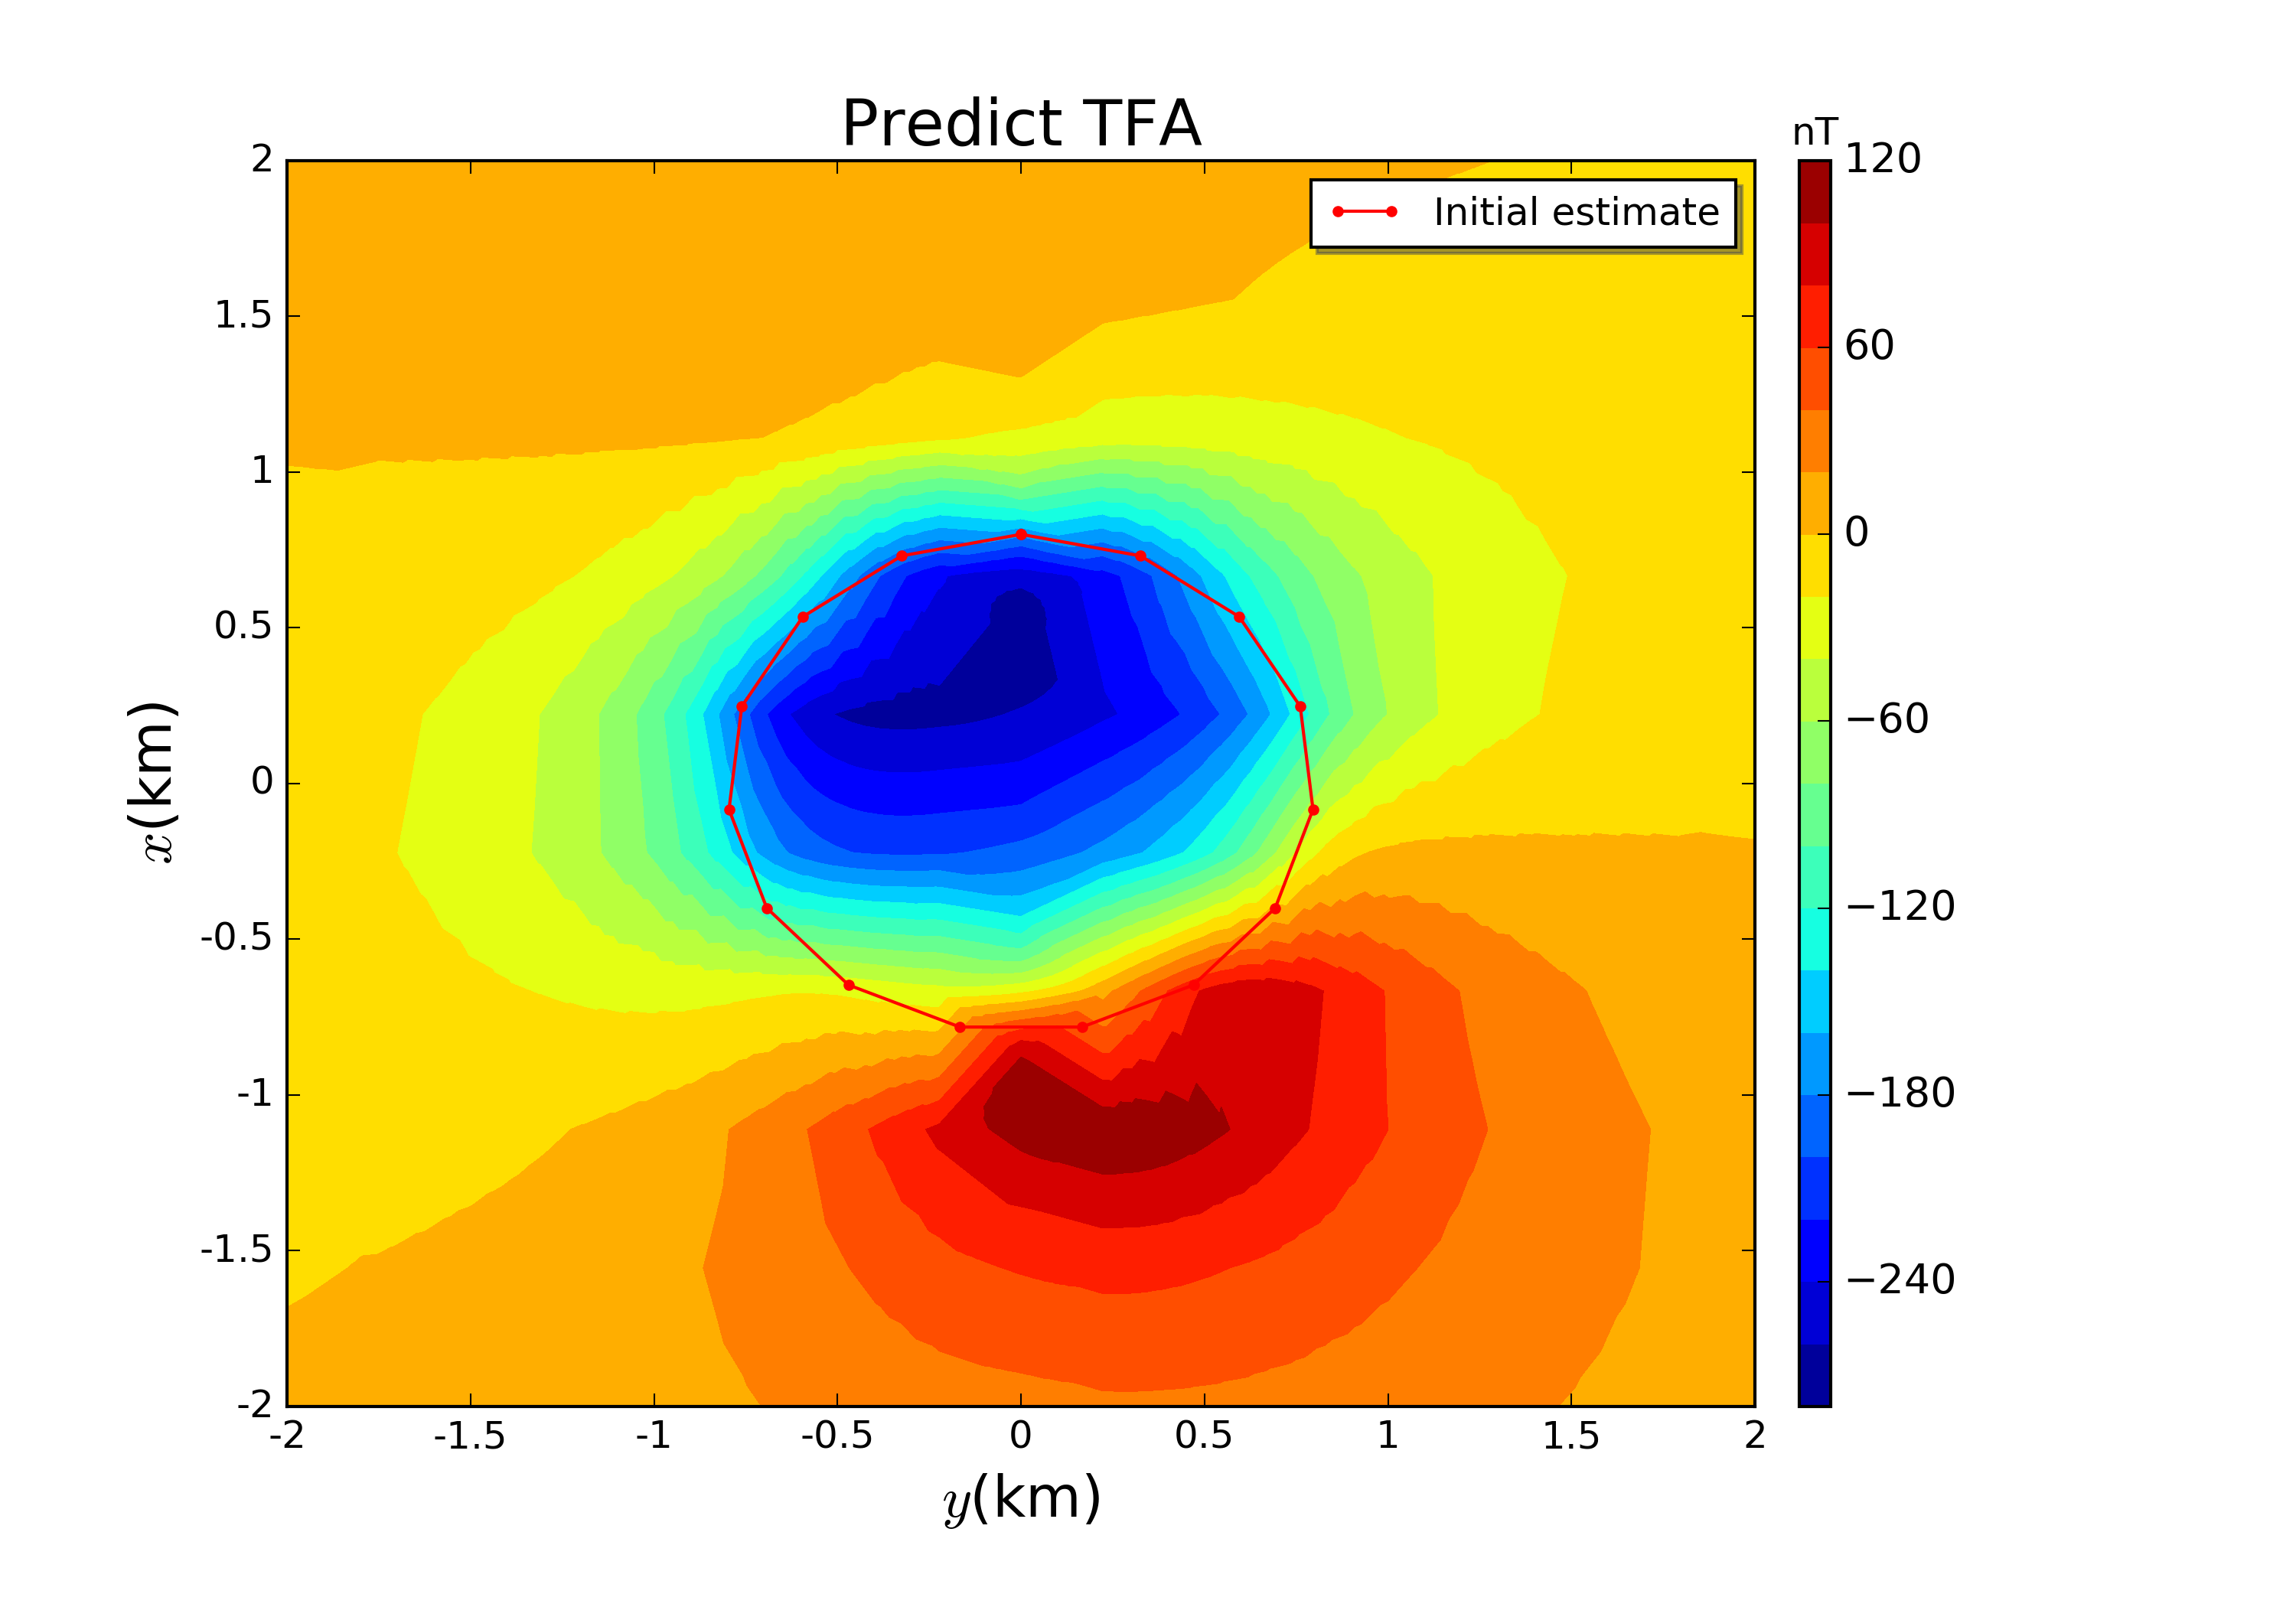

In [6]:
plt.figure(figsize=(10,7))
plt.title('Predict TFA', fontsize=20)
plt.tricontourf(kimberlite['y'], kimberlite['x'], kimberlite['initial_data'], 20, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
#source = mpl.polygon(kimberlite_model['prisms'][0], '.-k', xy2ne=True)
estimate = mpl.polygon(kimberlite['initial_estimate'][0], '.-r', xy2ne=True)
#source.set_label('Outcropping polygon')
estimate.set_label('Initial estimate')
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.savefig(mypath+'kimberlite_tfa_pred_data_true_inital.png', dpi=300)
#plt.show()

img(filename=mypath+'kimberlite_tfa_pred_data_true_inital.png', width=1000, height=1200)

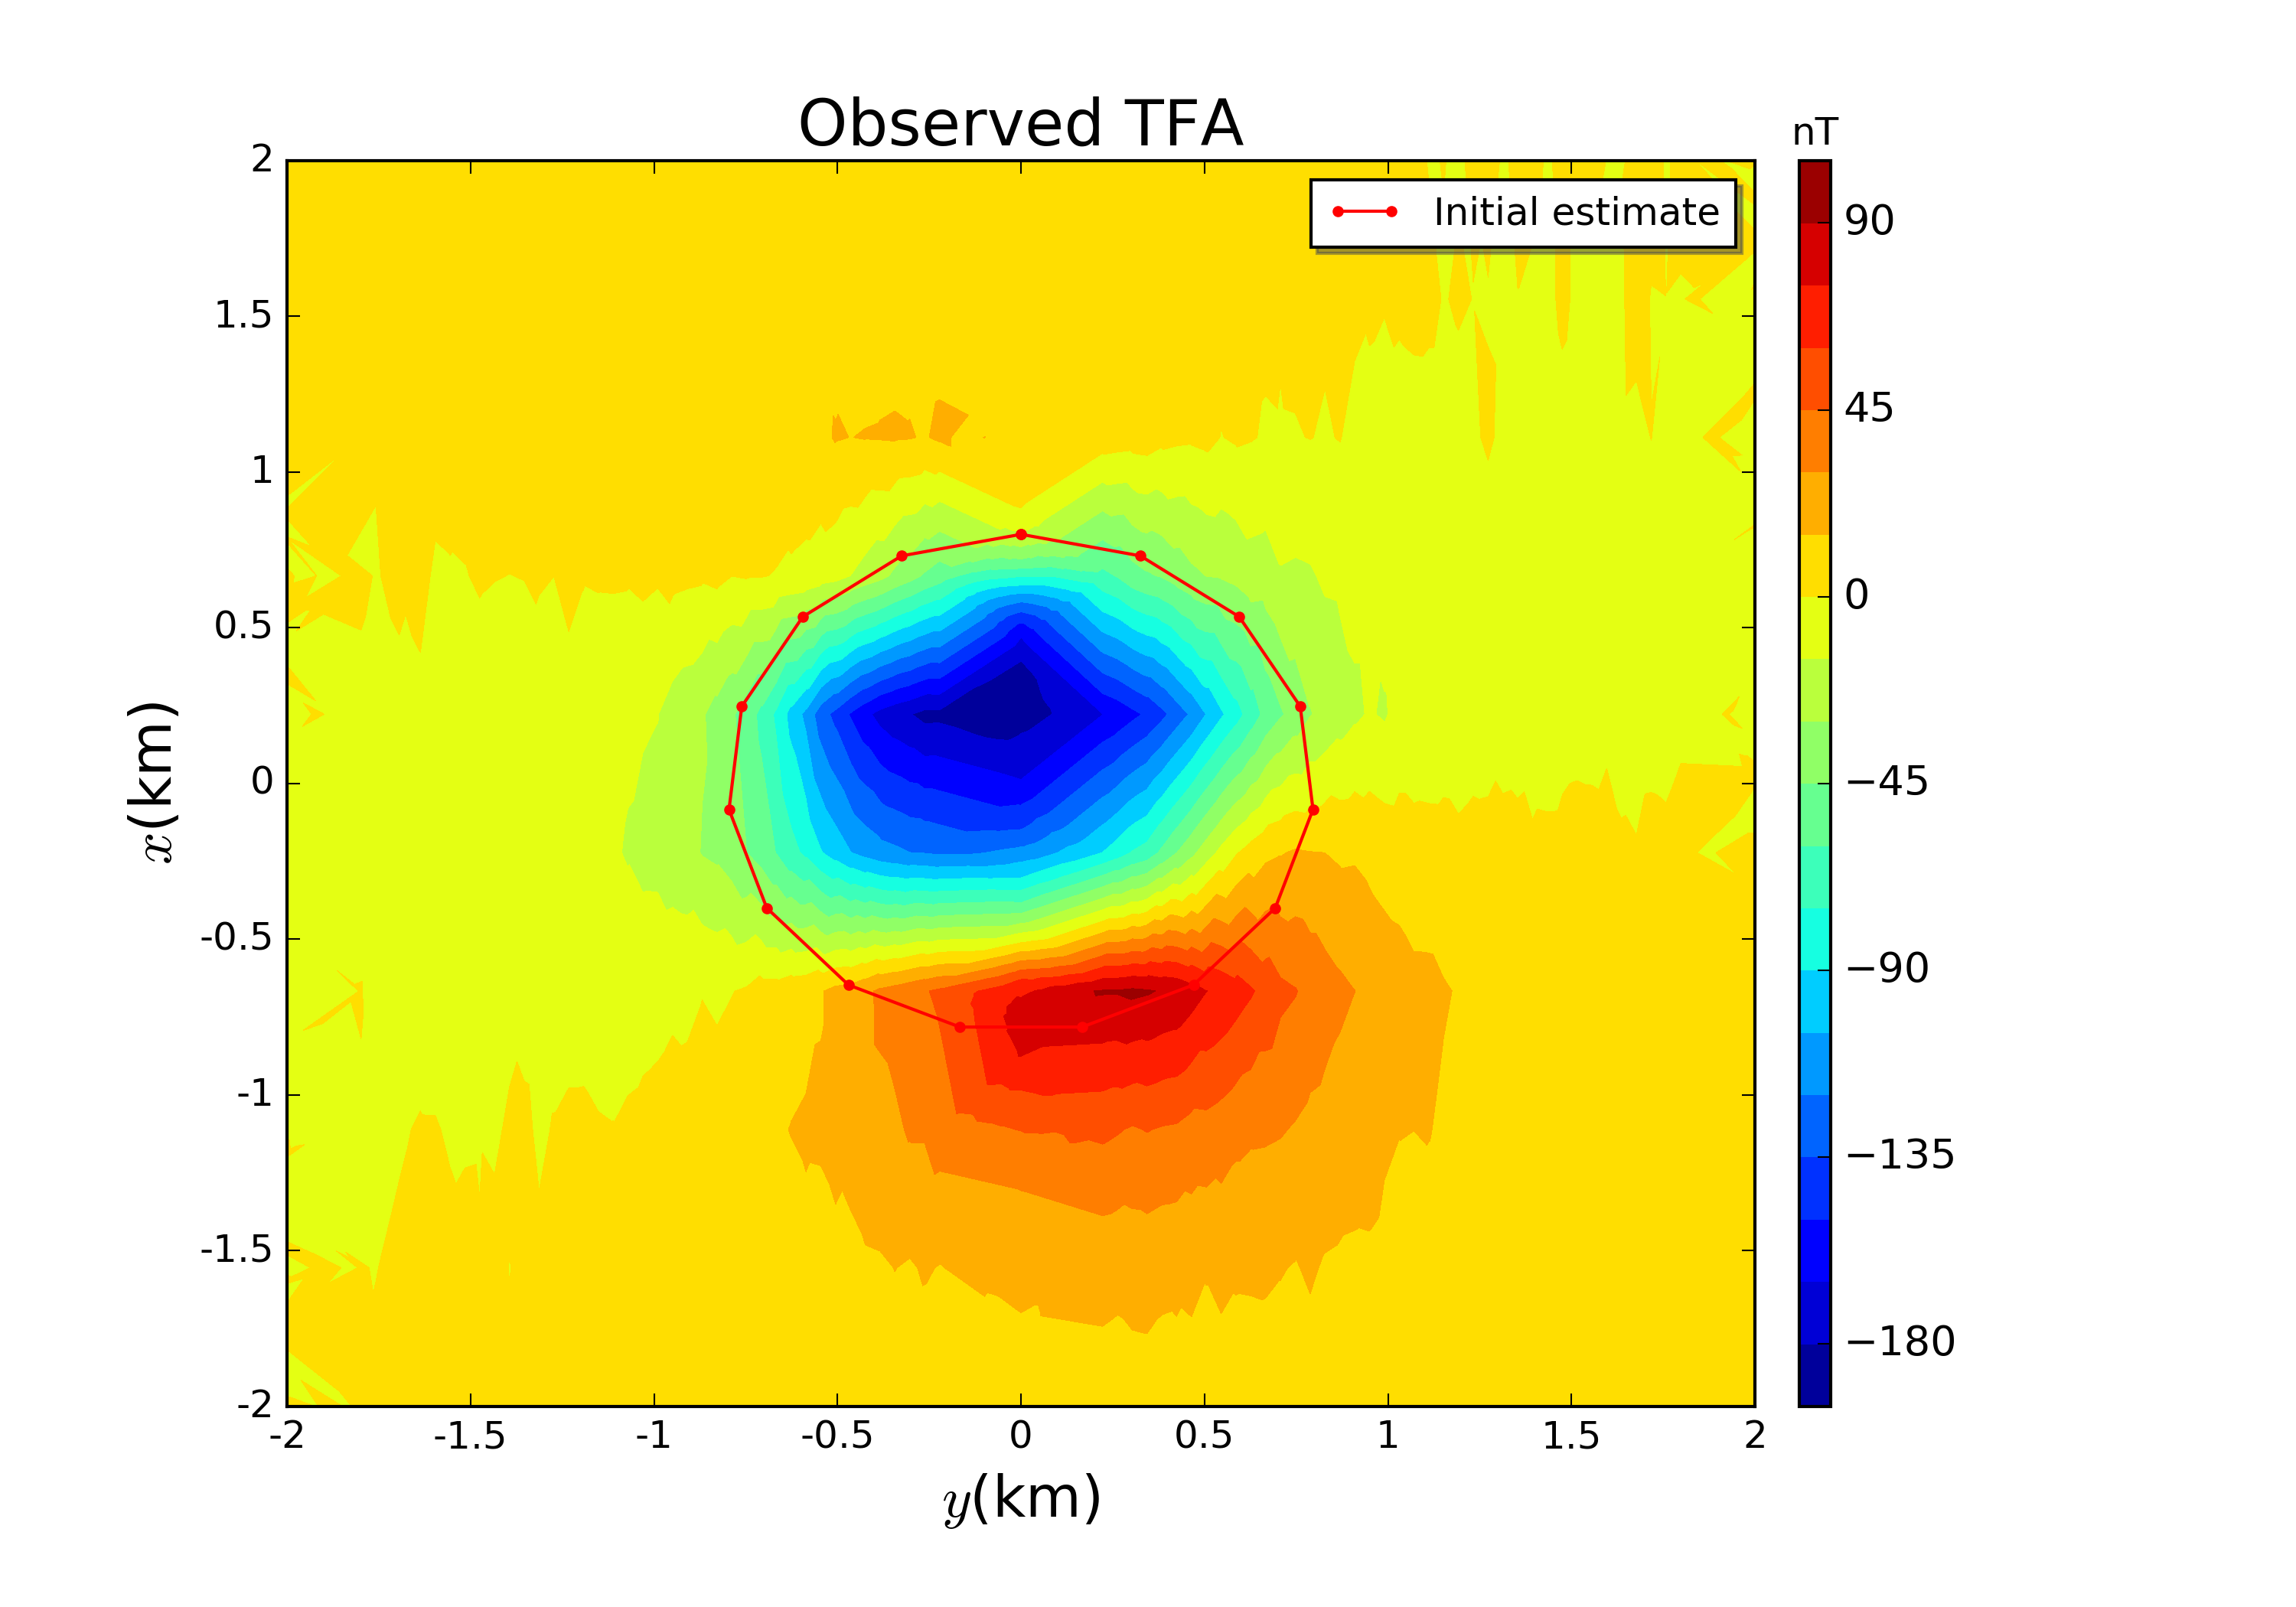

In [7]:
plt.figure(figsize=(10,7))
plt.title('Observed TFA', fontsize=20)
plt.tricontourf(kimberlite['y'], kimberlite['x'], kimberlite['observed_data'], 20, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
#source = mpl.polygon(kimberlite_model['prisms'][0], '.-k', xy2ne=True)
estimate = mpl.polygon(kimberlite['initial_estimate'][0], '.-r', xy2ne=True)
#source.set_label('Outcropping polygon')
estimate.set_label('Initial estimate')
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.savefig(mypath+'kimberlite_tfa_obs_data_true_inital.png', dpi=300)
#plt.show()

img(filename=mypath+'kimberlite_tfa_obs_data_true_inital.png', width=1000, height=1200)

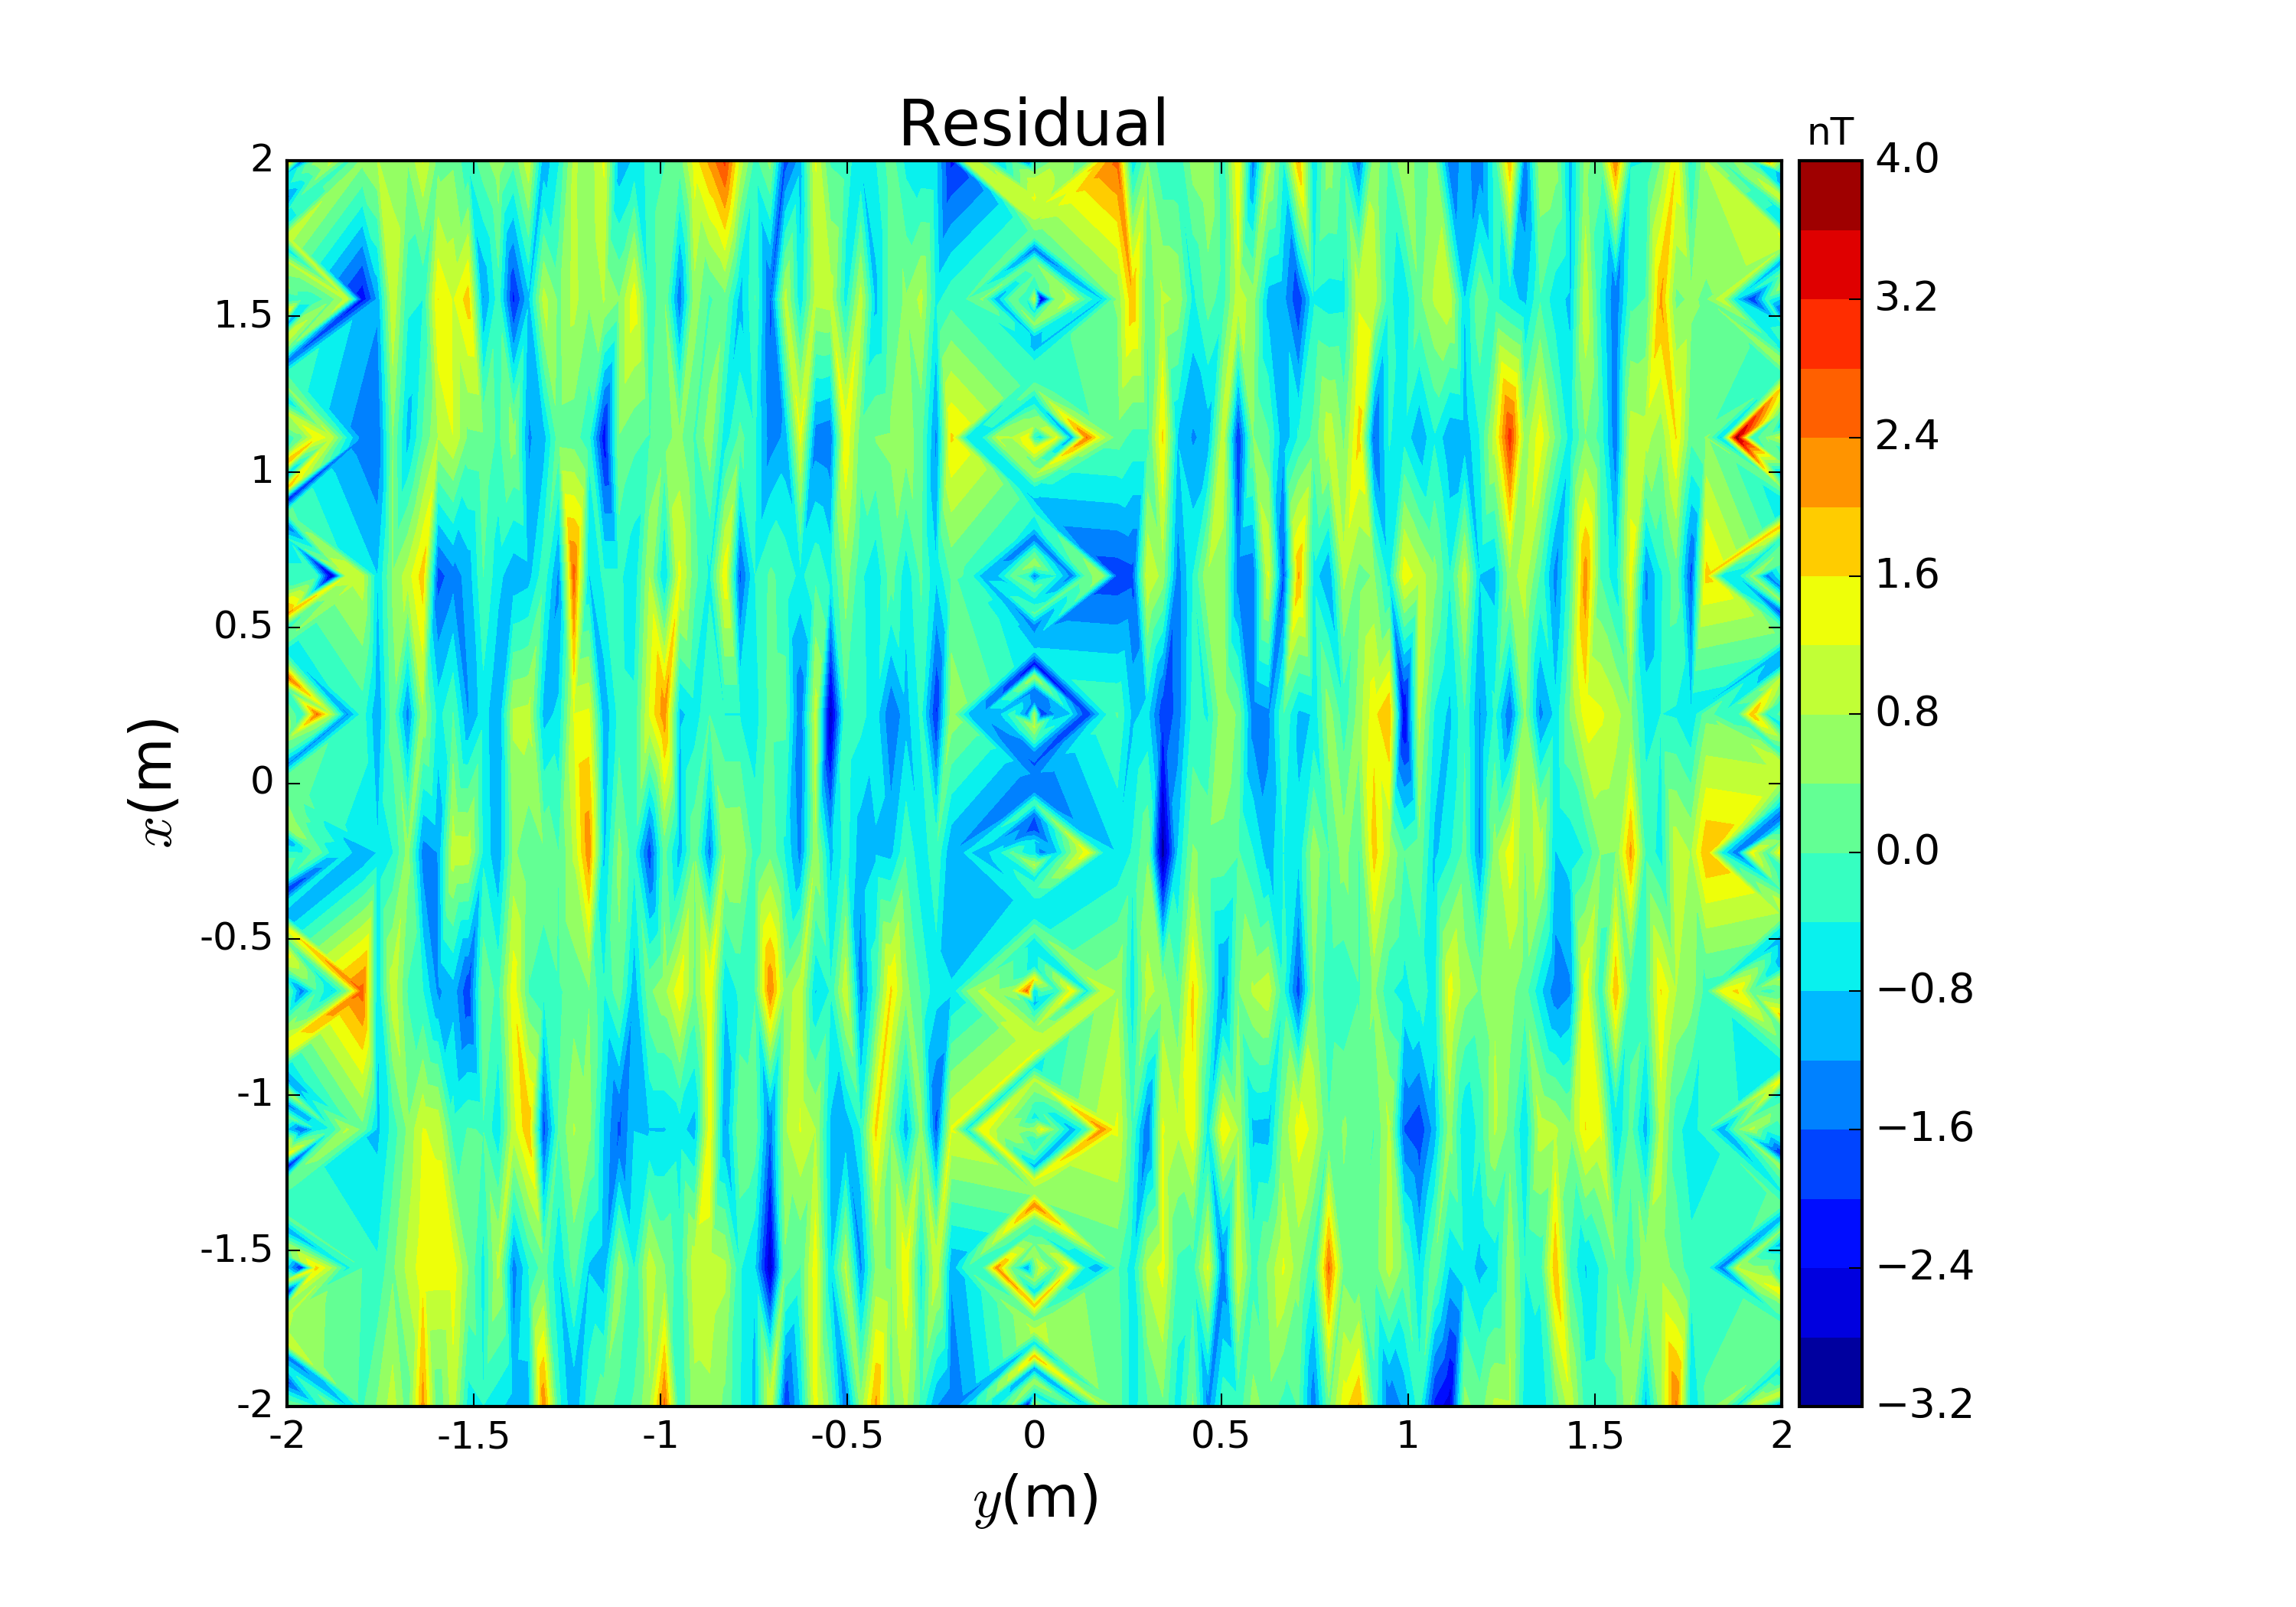

In [8]:
plt.figure(figsize=(10,7))
plt.title('Residual', fontsize=20)
plt.tricontourf(kimberlite['y'], kimberlite['x'], kimberlite['residual'], 20, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
mpl.m2km()
plt.savefig(mypath+'kimberlite_tfa_residual.png', dpi=300)
#plt.show()
img(filename=mypath+'kimberlite_tfa_residual.png', width=1600, height=400)

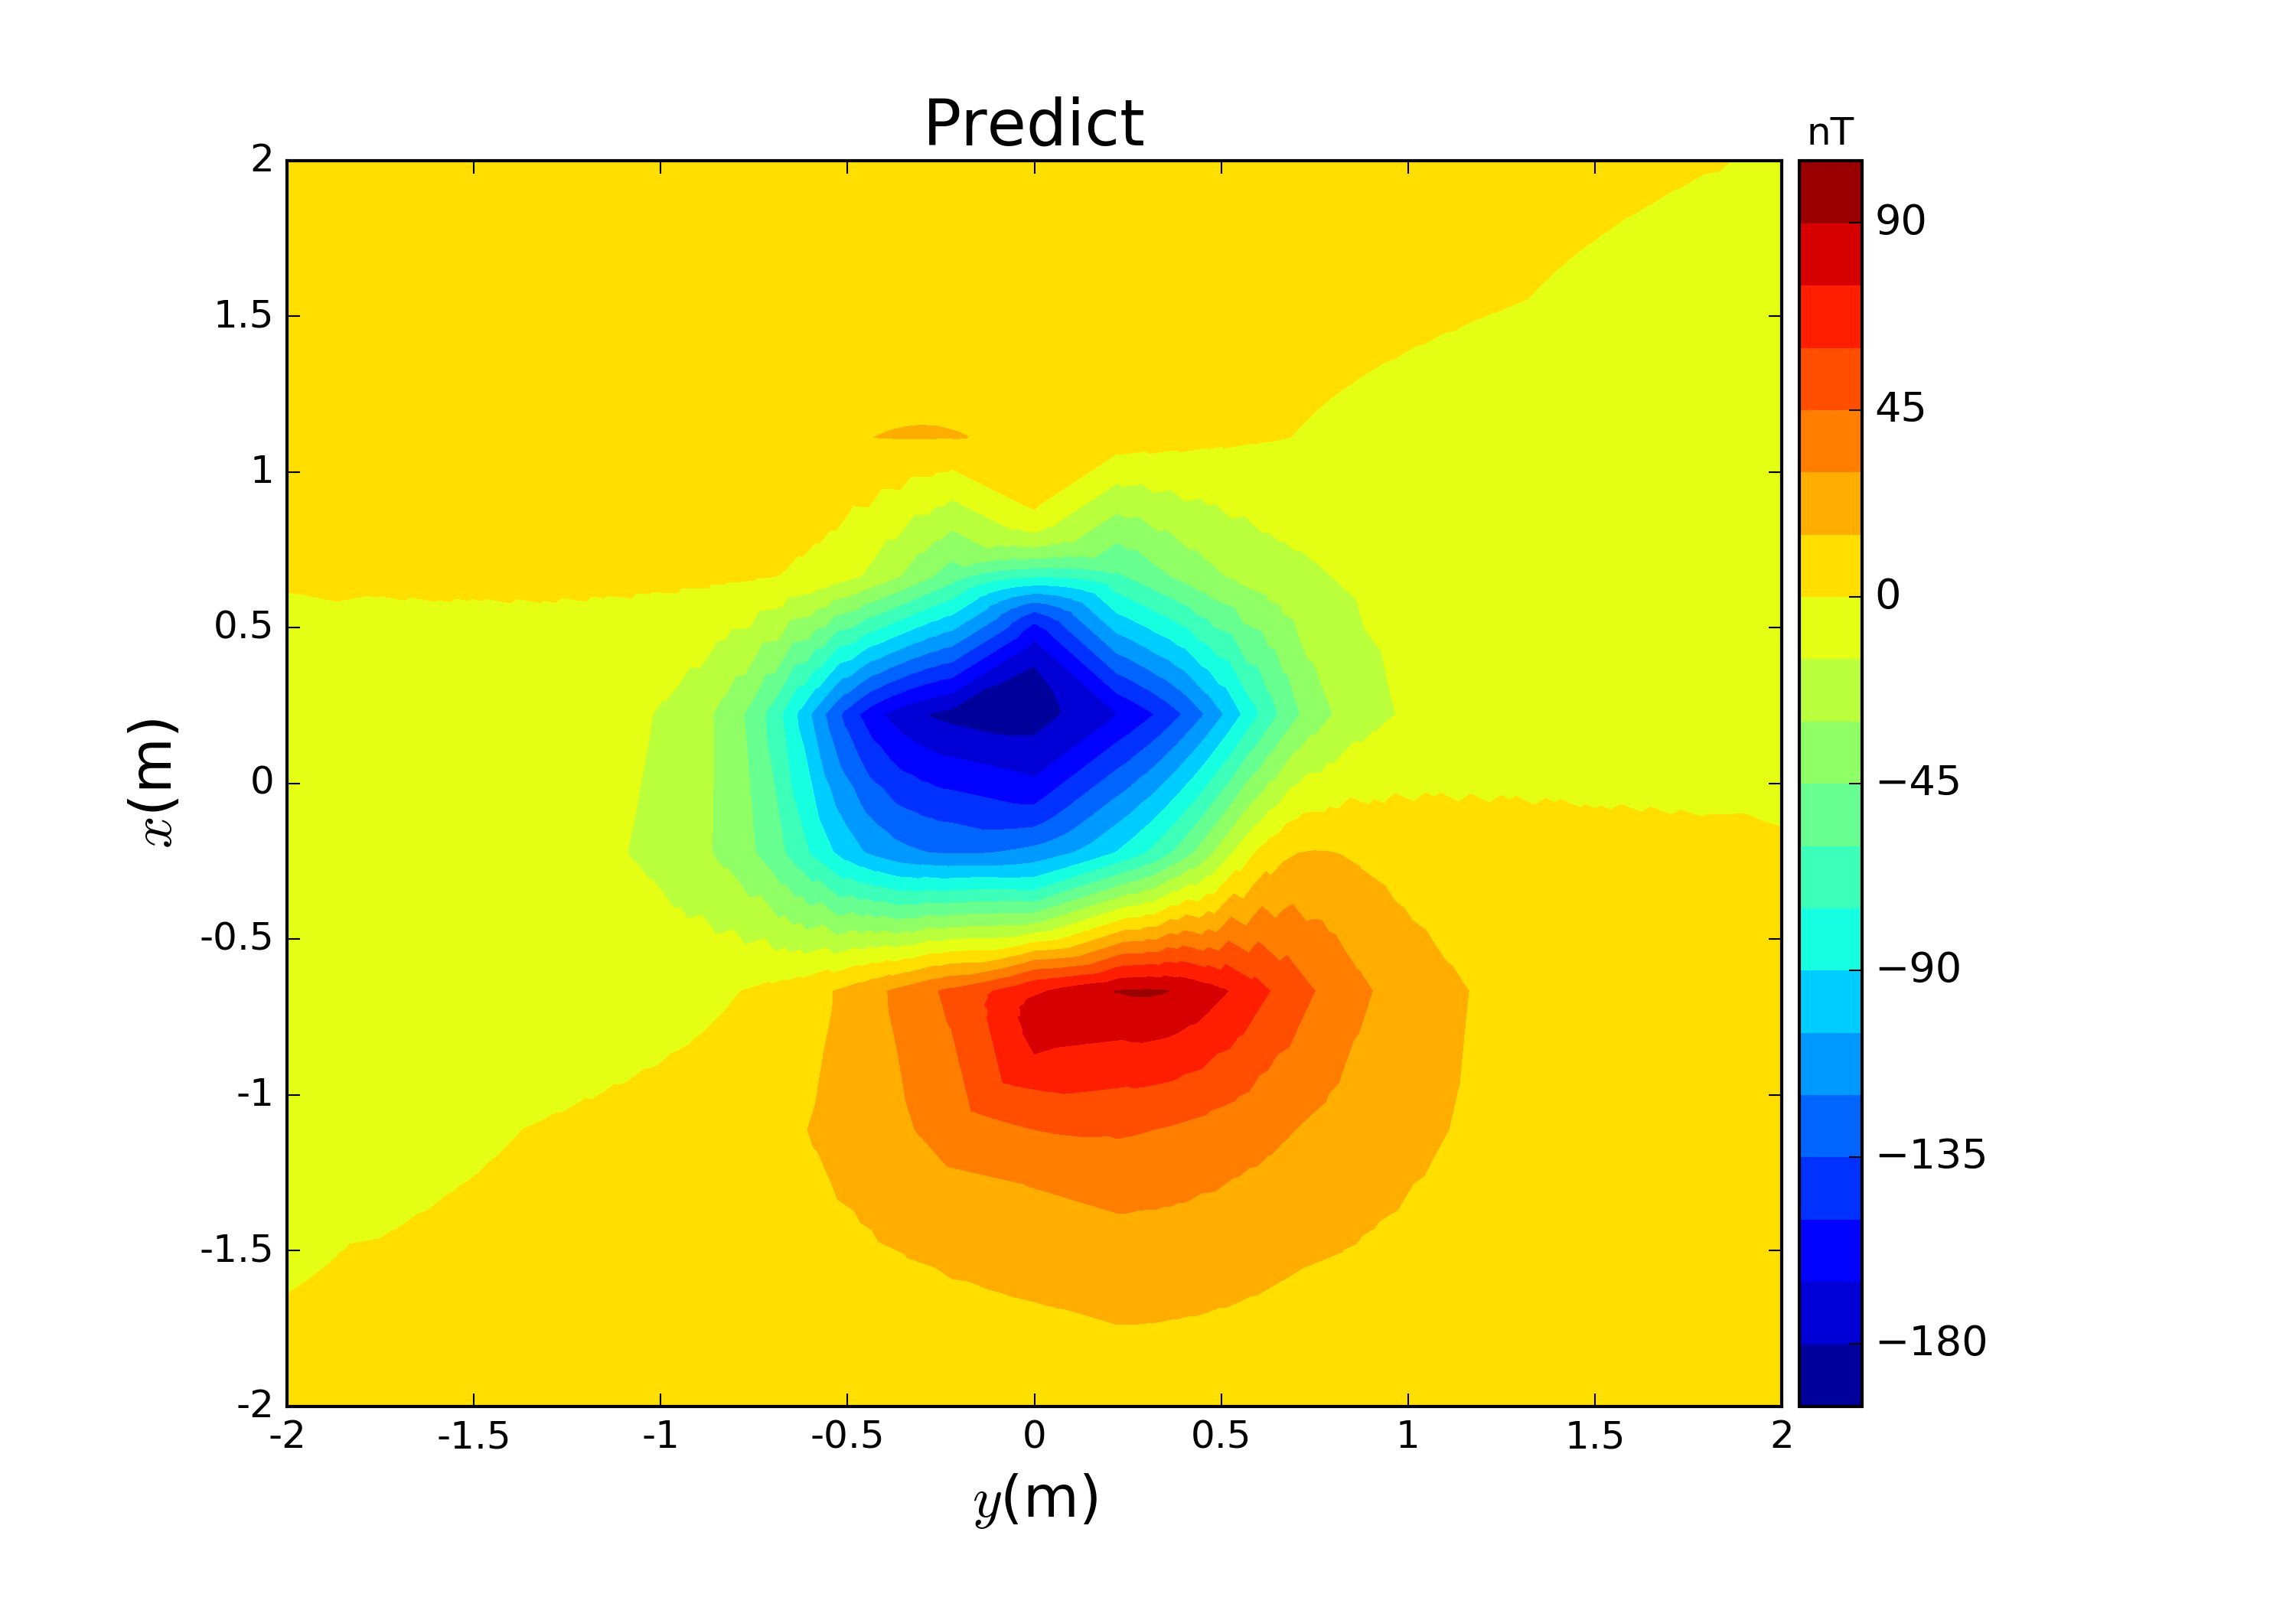

In [9]:
plt.figure(figsize=(10,7))
plt.title('Predict', fontsize=20)
plt.tricontourf(kimberlite['y'], kimberlite['x'], kimberlite['data_fit'], 20, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
mpl.m2km()
plt.savefig(mypath+'kimberlite_tfa_predict.png', dpi=300)
#plt.show()
img(filename=mypath+'kimberlite_tfa_predict.png', width=1600, height=400)

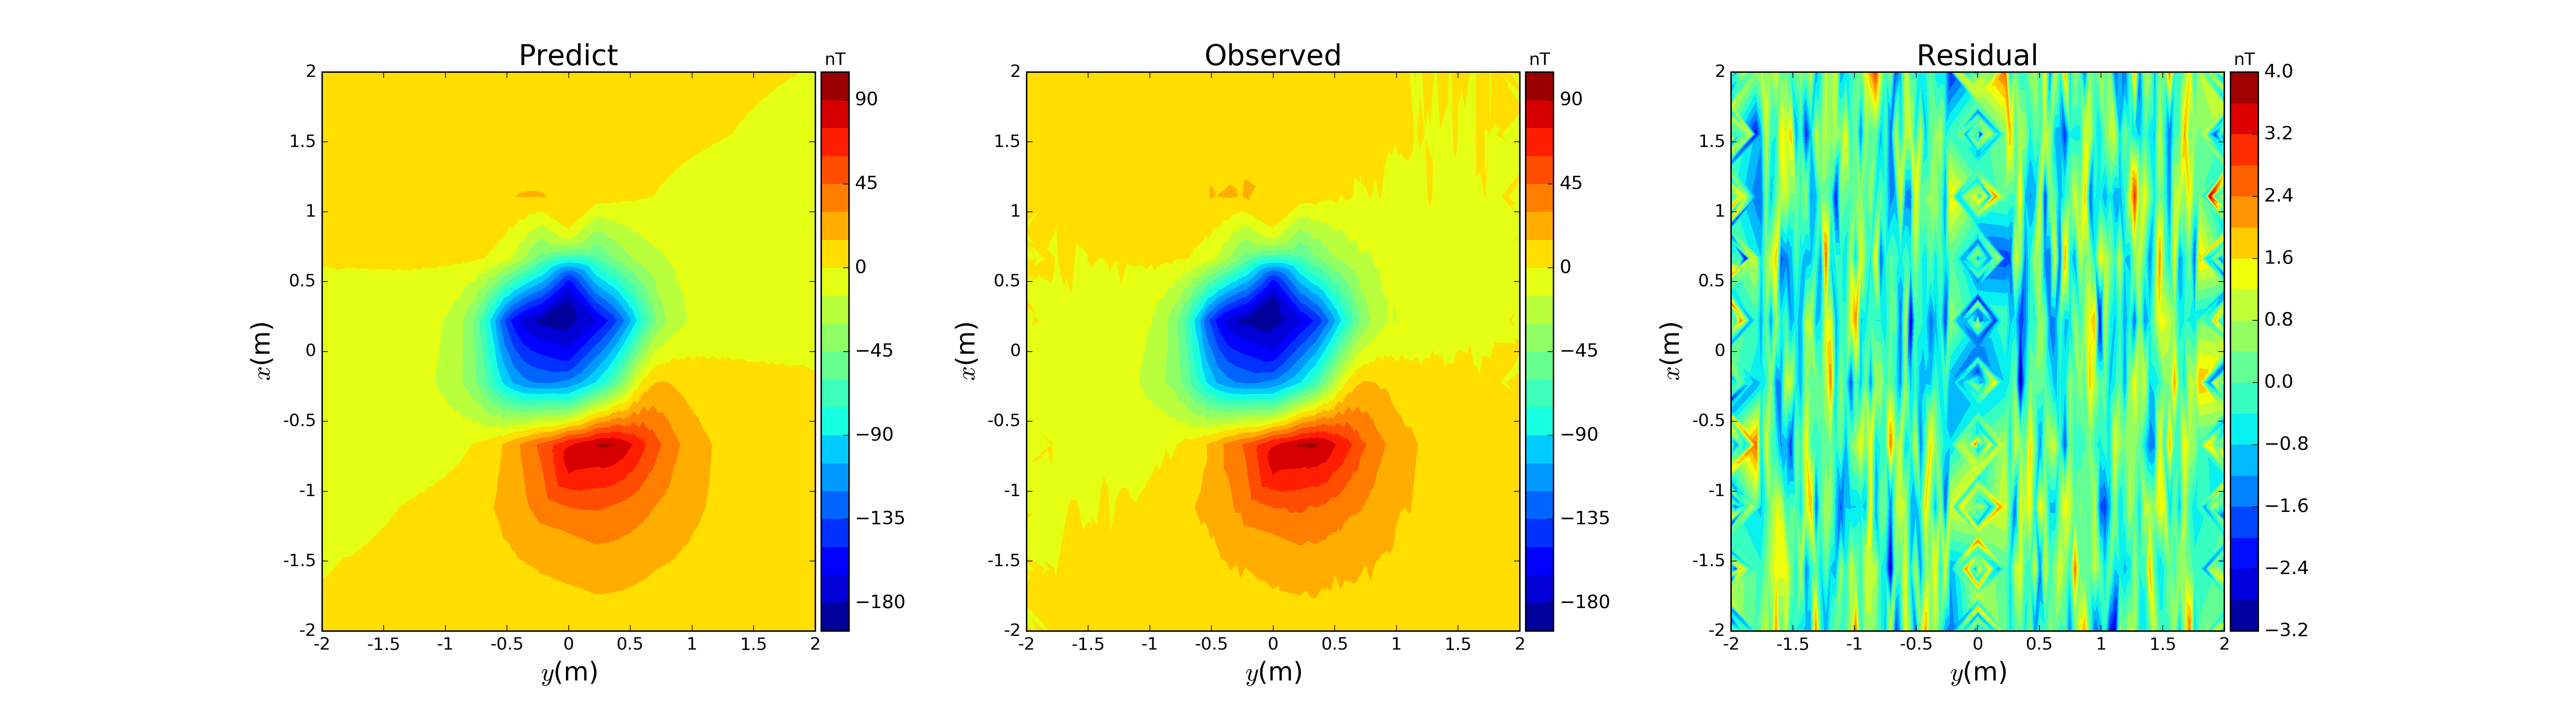

In [10]:
# plot
plt.figure(figsize=(25,7))
plt.subplot(1, 3, 1)
plt.title('Predict', fontsize=20)
plt.tricontourf(kimberlite['y'], kimberlite['x'], kimberlite['data_fit'],20, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.m2km()

plt.subplot(1, 3, 2)
plt.title('Observed', fontsize=20)
plt.tricontourf(kimberlite['y'], kimberlite['x'], kimberlite['observed_data'], 20, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.m2km()

plt.subplot(1, 3, 3)
plt.title('Residual', fontsize=20)
plt.tricontourf(kimberlite['y'], kimberlite['x'], kimberlite['residual'], 20, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
mpl.m2km()
plt.savefig(mypath+'kimberlite_tfa_fit.png', dpi=300)
#plt.show()
img(filename=mypath+'kimberlite_tfa_fit.png', width=1600, height=400)

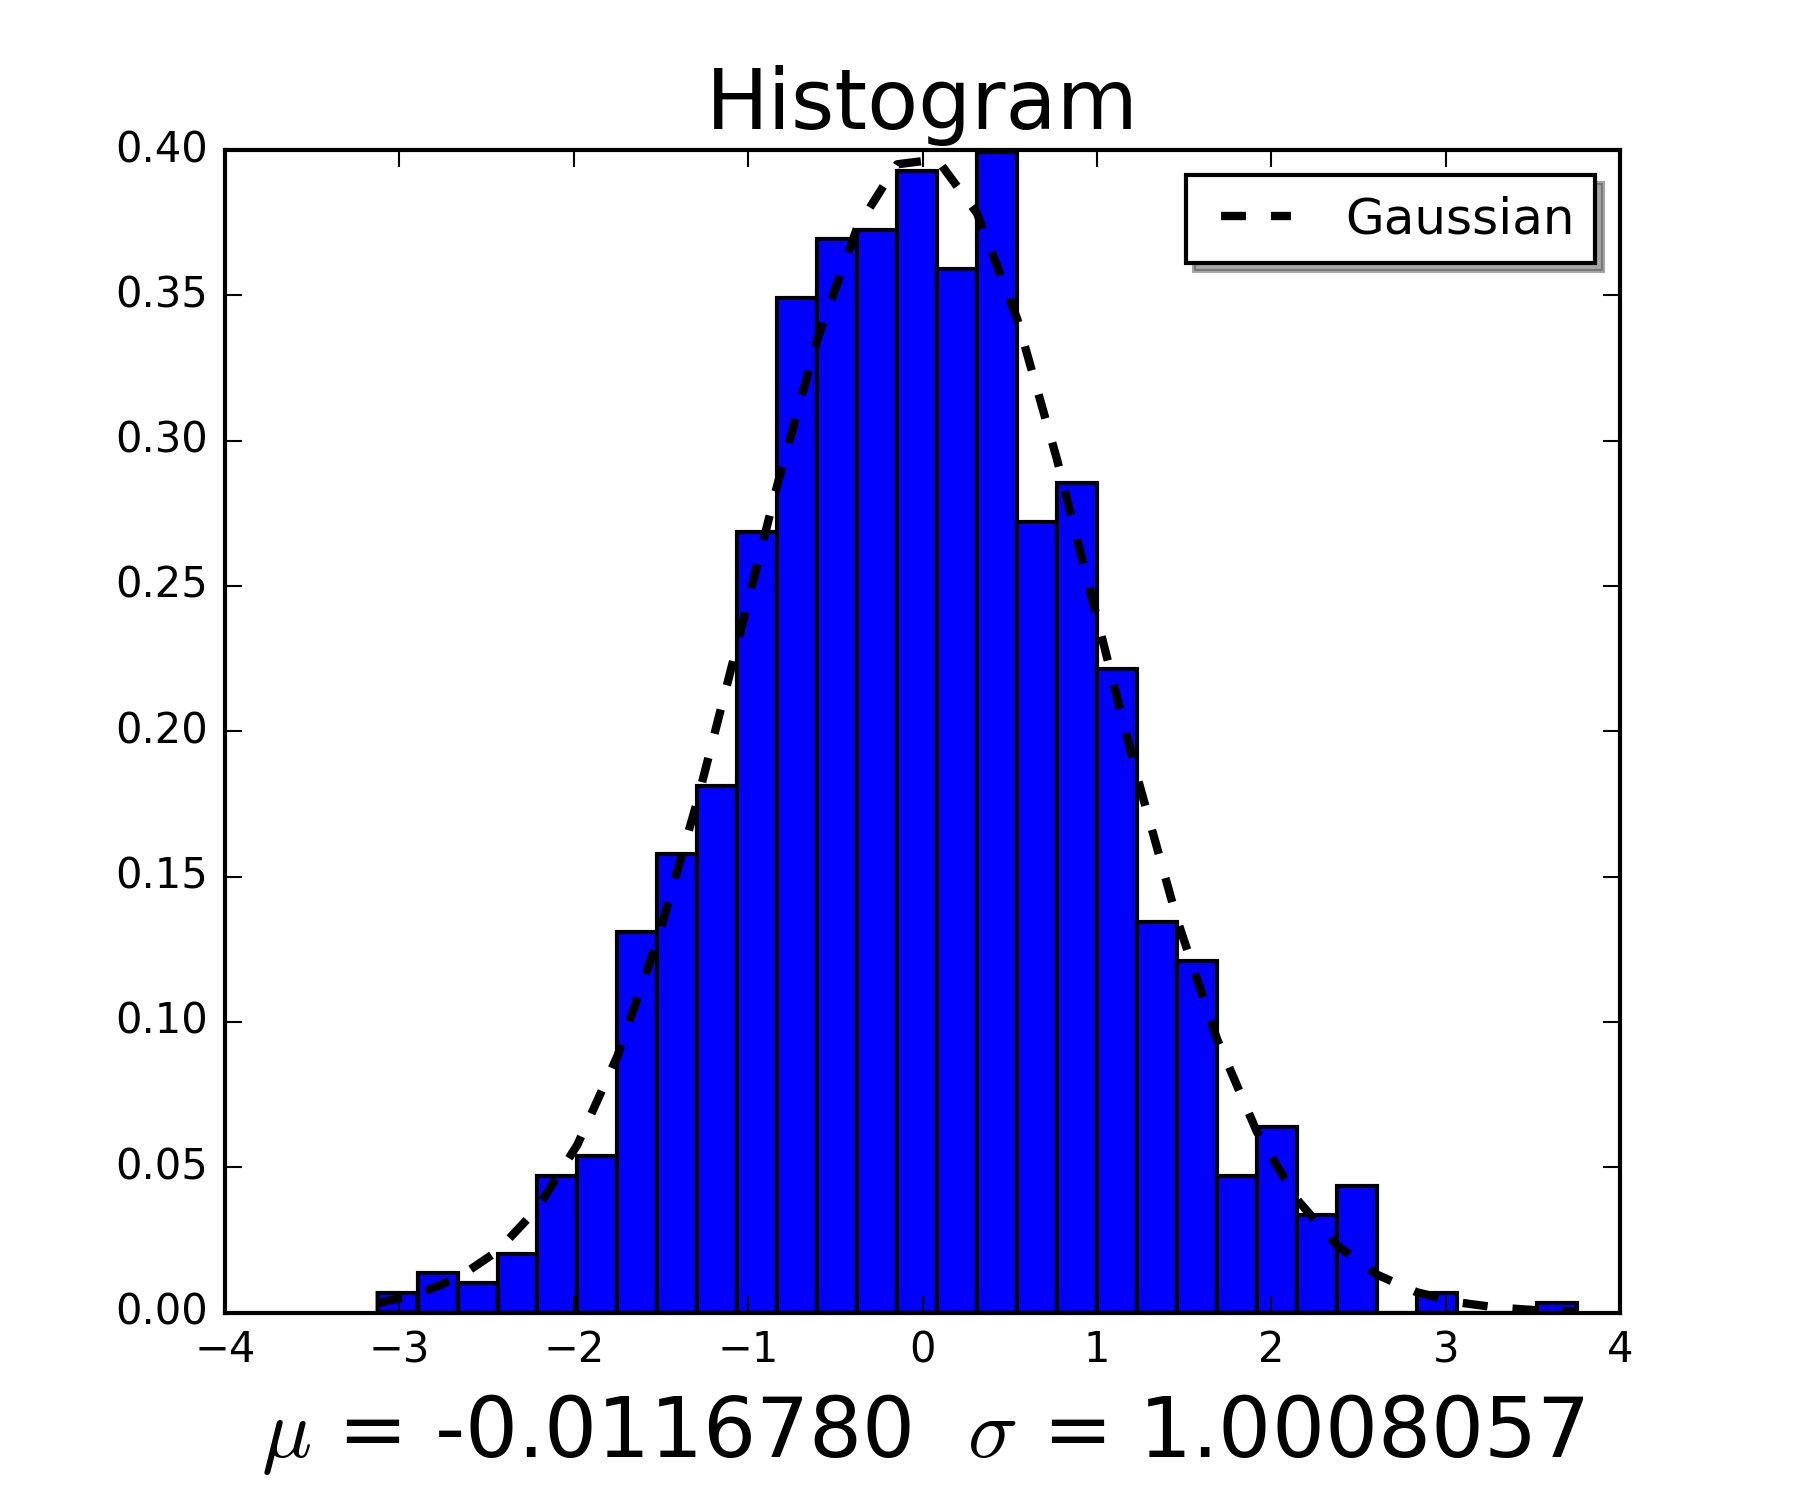

In [11]:
mean = np.mean(kimberlite['residual'])
std = np.std(kimberlite['residual'])
plt.figure(figsize=(6,5))
plt.title('Histogram', fontsize = 20)
plt.xlabel('$\mu$ = %.7f  $\sigma$ = %.7f' % (mean, std), fontsize=20)
#nbins = int((np.max(kimberlite['residual_norm']) - np.min(kimberlite['residual_norm'])))
nbins=30
n, bins, patches = plt.hist(kimberlite['residual'],bins=nbins, normed=True, color='blue')
gauss = normpdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=2., label='Gaussian')
#plt.ylim(0.,0.5)
#plt.xlim(-10., 10.)
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.savefig(mypath+'kimberlite_tfa_hist.png', dpi=300)
#plt.show()

img(filename=mypath+'kimberlite_tfa_hist.png', width=400, height=400)

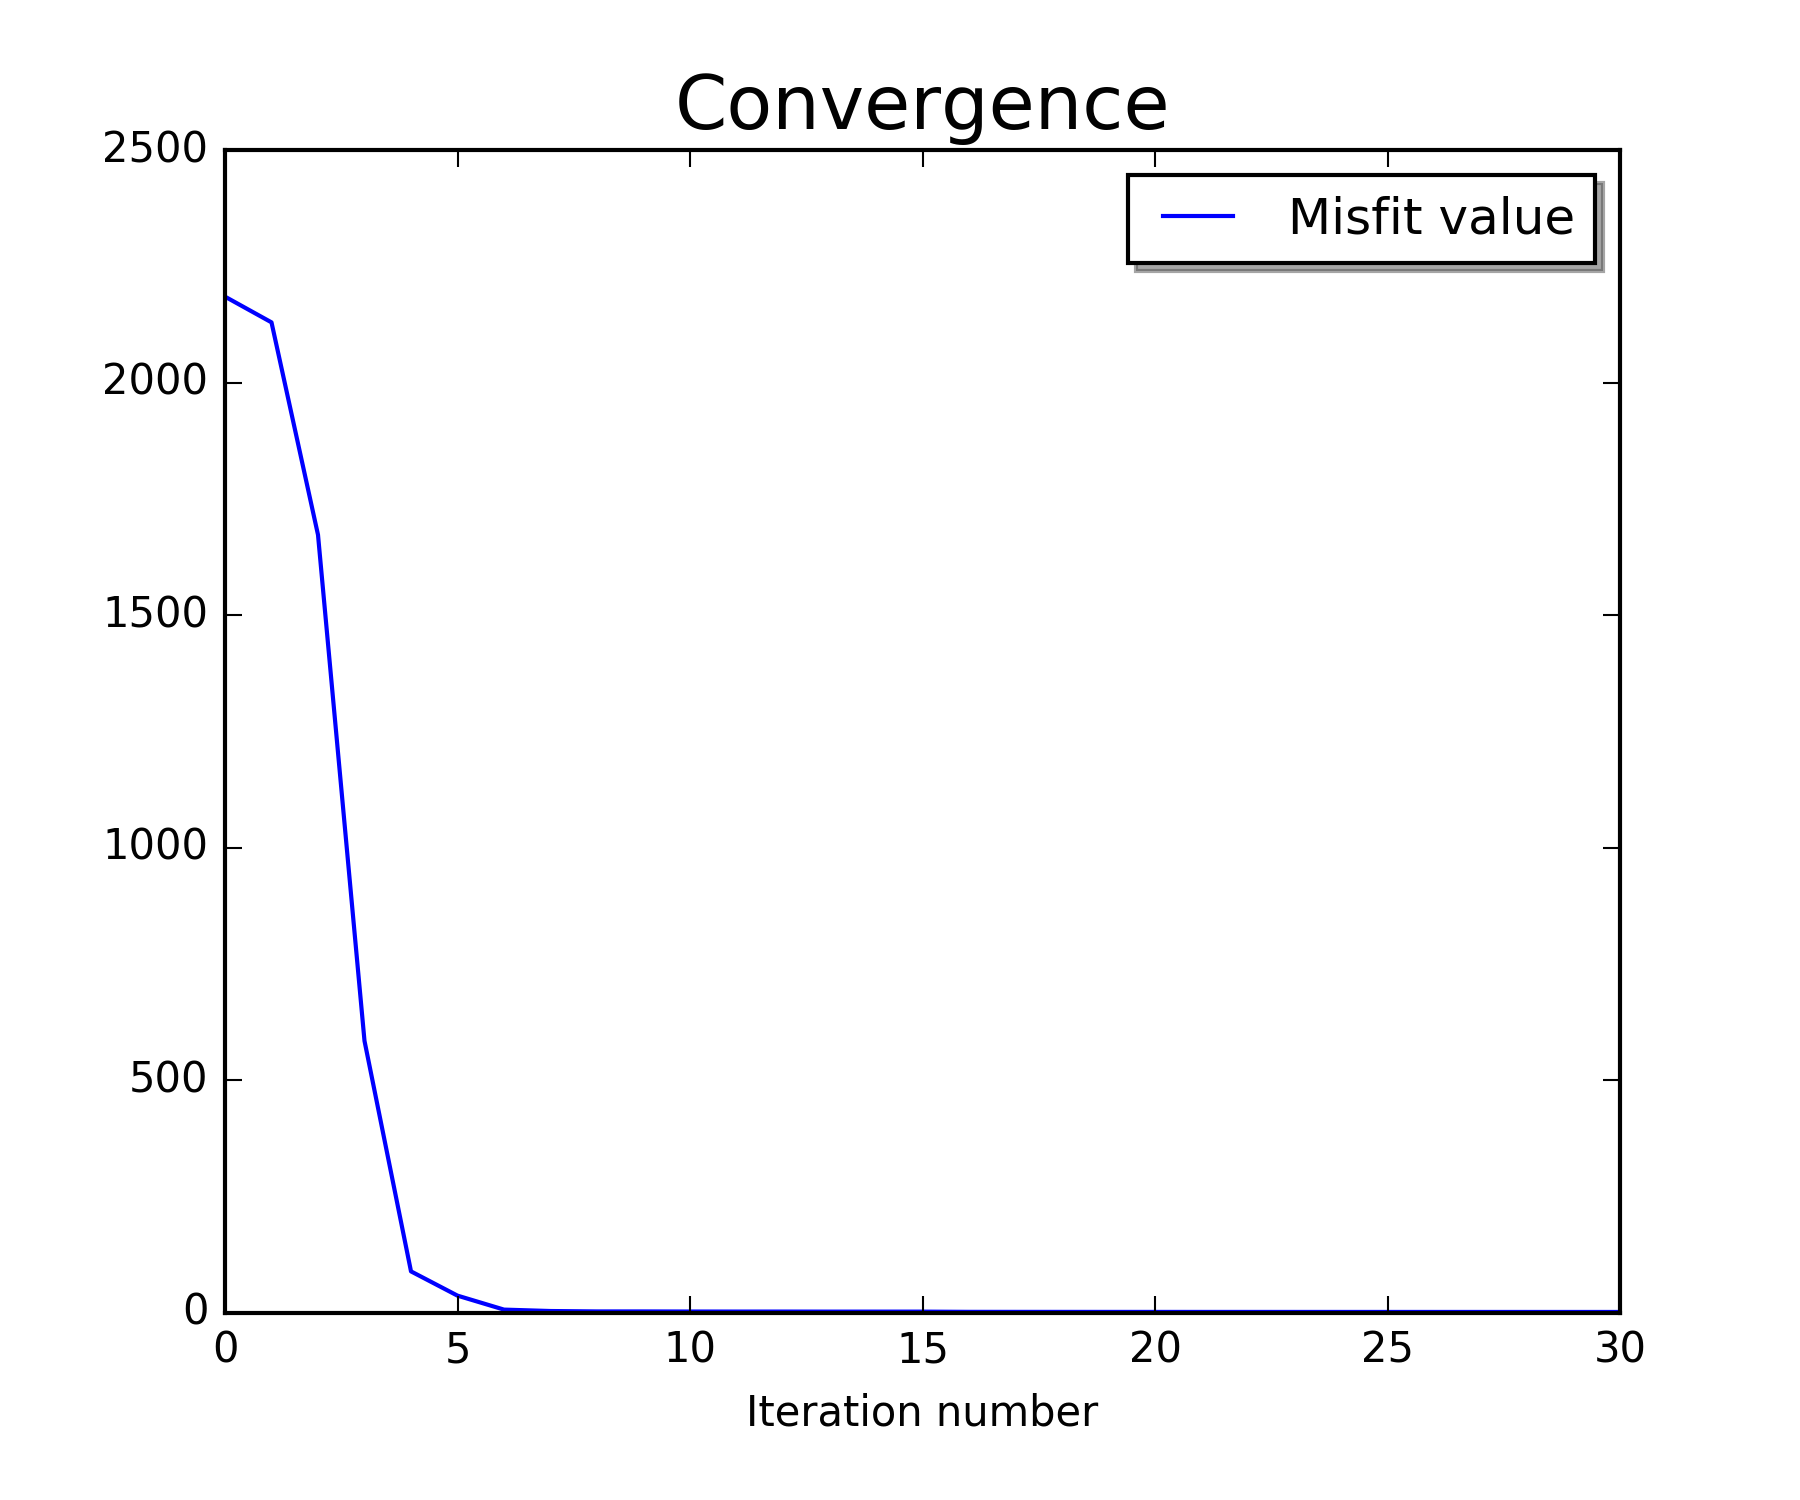

In [12]:
plt.figure(figsize=(6,5))
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
plt.plot(kimberlite['objective'], 'b-', label='Misfit value')
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)

plt.savefig(mypath+'kimberlite_tfa_convergence.png', dpi=300)
#plt.show()

img(filename=mypath+'kimberlite_tfa_convergence.png', width=400, height=400)

In [13]:
verts = []
# for i in range(kimberlite['prisms'][0].x.size):
#     top = []
#     bottom = []
#     top.append(np.array([kimberlite['prisms'][0].x[i],
#                          kimberlite['prisms'][0].y[i],
#                          kimberlite['prisms'][0].z1]))
#     bottom.append(np.array([kimberlite['prisms'][-1].x[i],
#                          kimberlite['prisms'][-1].y[i],
#                          kimberlite['prisms'][-1].z2]))
#     verts.append(top)
#     verts.append(bottom)

for o in kimberlite['prisms']:
    top = []
    bottom = []
    for x, y in zip(o.x, o.y):
        top.append(np.array([x,y,o.z1]))
        bottom.append(np.array([x,y,o.z2]))
    verts.append(top)
    verts.append(bottom)
    for i in range(o.x.size-1):
        sides = []
        sides.append(np.array([o.x[i], o.y[i], o.z1]))
        sides.append(np.array([o.x[i+1], o.y[i+1], o.z1]))
        sides.append(np.array([o.x[i+1], o.y[i+1], o.z2]))
        sides.append(np.array([o.x[i], o.y[i], o.z2]))
        verts.append(sides)
    sides = []
    sides.append(np.array([o.x[-1], o.y[-1], o.z1]))
    sides.append(np.array([o.x[0], o.y[0], o.z1]))
    sides.append(np.array([o.x[0], o.y[0], o.z2]))
    sides.append(np.array([o.x[-1], o.y[-1], o.z2]))
    verts.append(sides)

In [14]:
verts_true = []

# for i in range(kimberlite['prisms'][0].x.size):
#     top = []
#     bottom = []
#     top.append(np.array([kimberlite_model['prisms'][0].x[i],
#                          kimberlite_model['prisms'][0].y[i],
#                          kimberlite_model['prisms'][0].z1]))
#     bottom.append(np.array([kimberlite_model['prisms'][-1].x[i],
#                          kimberlite_model['prisms'][-1].y[i],
#                          kimberlite_model['prisms'][-1].z2]))
#     verts_true.append(top)
#     verts_true.append(bottom)
for o in kimberlite_model['prisms']:
    top = []
    bottom = []
    for x, y in zip(o.x, o.y):
        top.append(np.array([x,y,o.z1]))
        bottom.append(np.array([x,y,o.z2]))
    verts_true.append(top)
    verts_true.append(bottom)
    for i in range(o.x.size-1):
        sides = []
        sides.append(np.array([o.x[i], o.y[i], o.z1]))
        sides.append(np.array([o.x[i+1], o.y[i+1], o.z1]))
        sides.append(np.array([o.x[i+1], o.y[i+1], o.z2]))
        sides.append(np.array([o.x[i], o.y[i], o.z2]))
        verts_true.append(sides)
    sides = []
    sides.append(np.array([o.x[-1], o.y[-1], o.z1]))
    sides.append(np.array([o.x[0], o.y[0], o.z1]))
    sides.append(np.array([o.x[0], o.y[0], o.z2]))
    sides.append(np.array([o.x[-1], o.y[-1], o.z2]))
    verts_true.append(sides)

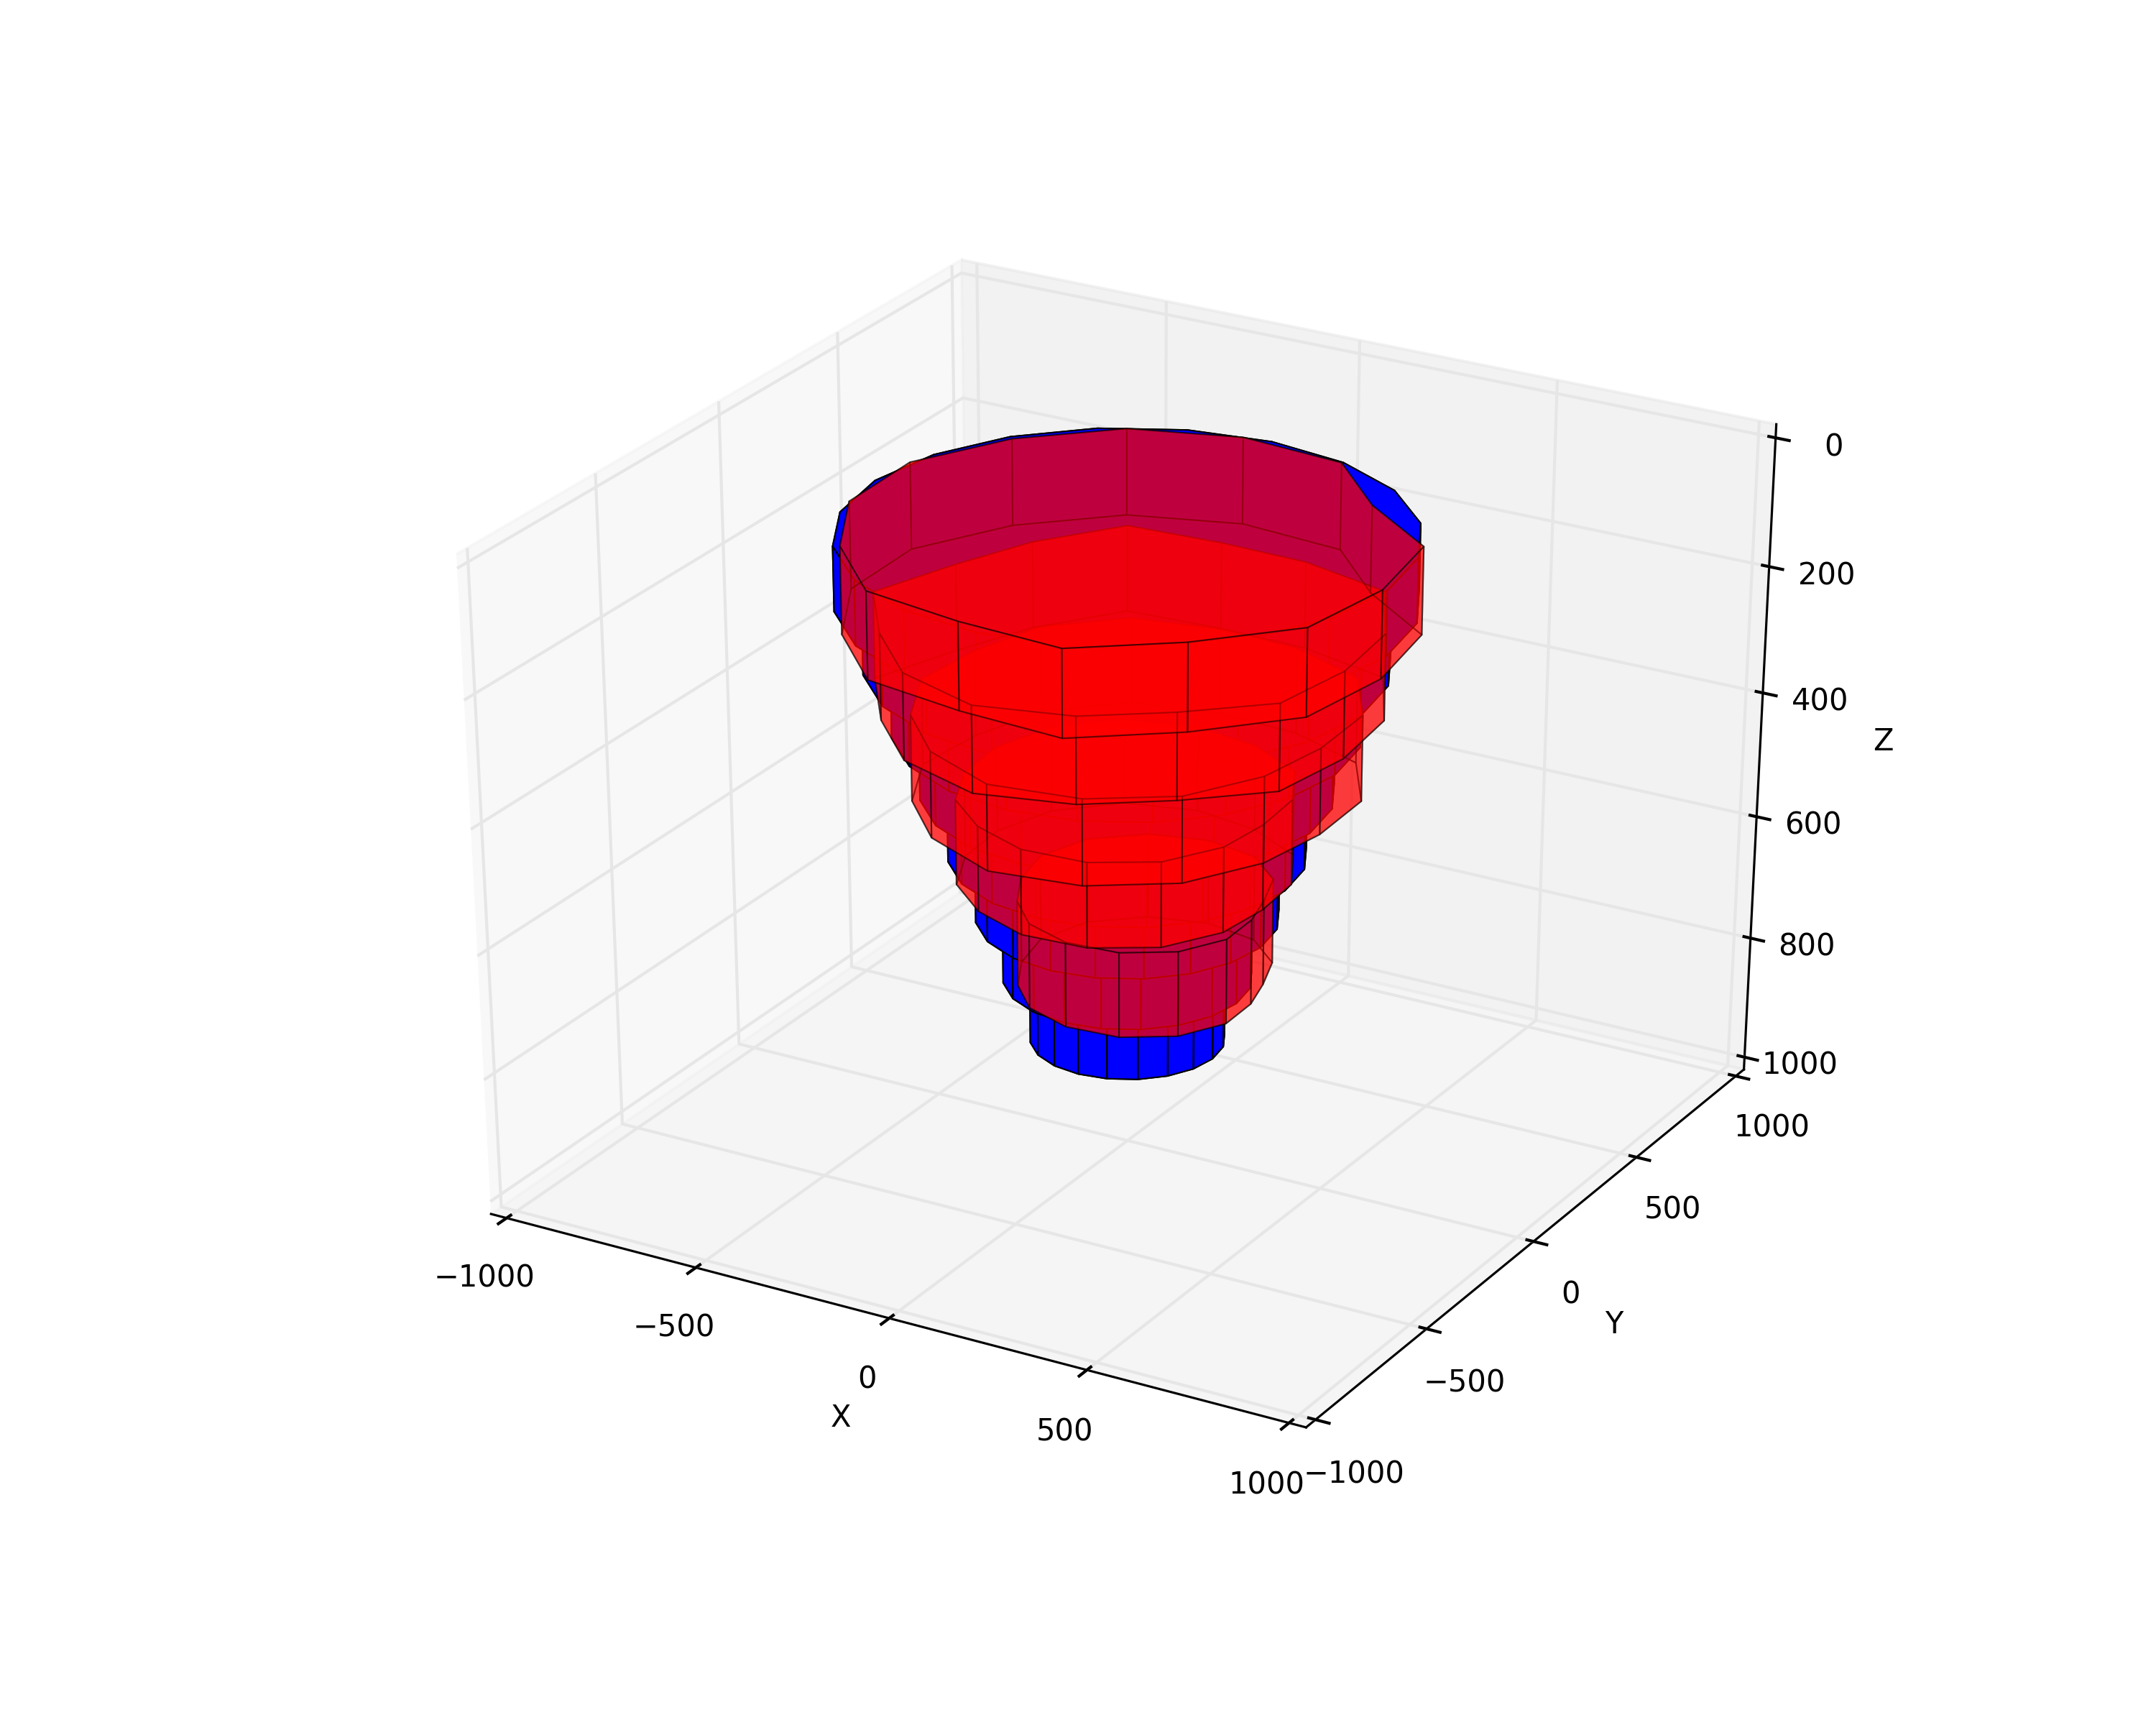

In [15]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts_true, 
 facecolors='b', linewidths=0.5, edgecolors='k', alpha=1))
ax.add_collection3d(Poly3DCollection(verts, 
facecolors='r', linewidths=0.5, edgecolors='k', alpha=0.5))

ax.set_xlim(-1000, 1000, 100)
ax.set_ylim(-1000, 1000, 100)
ax.set_zlim(1000,0,100)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.savefig(mypath+'kimberlite_3d_estimate.png', dpi=300)
#plt.show()

img(filename=mypath+'kimberlite_3d_estimate.png', width=400, height=400)

In [ ]:
bounds = [-1000., 1000., -1000., 1000., -100., 1550.]
red, green, blue = (1, 0, 0), (0, 1, 0), (0, 0, 1)
white, black = (1, 1, 1), (0, 0, 0),

# Show the model
scene = myv.figure()
myv.polyprisms(kimberlite_model['prisms'], 'magnetization', color=blue, linewidth=1., opacity=.5, edges=False)
myv.polyprisms(kimberlite['initial_estimate'], 'magnetization', color=red, linewidth=1.)

ax = myv.axes(myv.outline(bounds), ranges=[i * 0.001 for i in bounds])
ax.axes.x_label, ax.axes.y_label, ax.axes.z_label = 'x (km)', 'y (km)', 'z (km)'
ax.axes.font_factor = 1.65
scene.scene.camera.position = [-3566.1035732701748, -2440.7585385434886, 160.74965988407459]
scene.scene.camera.focal_point = [-1.9226665366075395e-12, -3.3646664390631945e-12, 425.00000000000159]
scene.scene.camera.view_angle = 30.0
scene.scene.camera.view_up = [0.018389012839469615, 0.081023817450175964, -0.99654251550678474]
scene.scene.camera.clipping_range = [2289.6962031406597, 6907.5456227163704]
scene.scene.camera.compute_view_plane_normal()
scene.scene.render()

myv.wall_bottom(ax.axes.bounds, opacity=0.2)
myv.wall_north(ax.axes.bounds)

myv.savefig(mypath+'kimberlite_tfa_true_initial.png')
myv.show()

In [ ]:
bounds = [-700., 700., -700., 700., -100., 1150.]
red, green, blue = (1, 0, 0), (0, 1, 0), (0, 0, 1)
white, black = (1, 1, 1), (0, 0, 0),

# Show the model
scene = myv.figure()
myv.polyprisms(kimberlite_model['prisms'], 'magnetization', color=blue, linewidth=1., opacity=.5, edges=False)
myv.polyprisms(kimberlite['prisms'], 'magnetization', color=red, linewidth=1.)

ax = myv.axes(myv.outline(bounds), ranges=[i * 0.001 for i in bounds])
ax.axes.x_label, ax.axes.y_label, ax.axes.z_label = 'x (km)', 'y (km)', 'z (km)'
ax.axes.font_factor = 1.5
scene.scene.camera.position = [-0.089204656936016313, -0.066107174155361687, -0.04083578885723696]
scene.scene.camera.focal_point = [1.1820671636724554e-16, 1.3134079596360617e-17, -1.9701119394540926e-17]
scene.scene.camera.view_angle = 30.0
scene.scene.camera.view_up = [0.24683390337942718, 0.24593292331329802, -0.93733132955911114]
scene.scene.camera.clipping_range = [0.057117737884348194, 0.1956040854922288]
scene.scene.camera.compute_view_plane_normal()

myv.wall_bottom(ax.axes.bounds, opacity=0.2)
myv.wall_north(ax.axes.bounds)
#myv.title('bolacha', color=(0, 0, 0), size=1.3, height=0.5)
myv.savefig(mypath+'kimberlite_tfa_bolacha1.png')
myv.show()

#img(filename='figs/kimberlite_tfa_td_bolacha1.png')

# Show the model
scene = myv.figure()
myv.polyprisms(kimberlite_model['prisms'], 'magnetization', color=blue, linewidth=1., opacity=.5, edges=False)
myv.polyprisms(kimberlite['prisms'], 'magnetization', color=red, linewidth=1.)


ax = myv.axes(myv.outline(bounds), ranges=[i * 0.001 for i in bounds])
ax.axes.x_label, ax.axes.y_label, ax.axes.z_label = 'x (km)', 'y (km)', 'z (km)'
ax.axes.font_factor = 1.5
scene.scene.camera.position = [1387.431758173668, 3940.587088035918, -711.23575855995603]
scene.scene.camera.focal_point = [-1.9226665366075403e-12, -3.8453330732150806e-12, 425.00000000000171]
scene.scene.camera.view_angle = 30.0
scene.scene.camera.view_up = [-0.053368194299606389, -0.25926638141600067, -0.96433022316250794]
scene.scene.camera.clipping_range = [2297.6930207290479, 6897.4792769581109]
scene.scene.camera.compute_view_plane_normal()
scene.scene.render()

myv.wall_bottom(ax.axes.bounds, opacity=0.2)
myv.wall_north(ax.axes.bounds)
#myv.title('bolacha', color=(0, 0, 0), size=1.3, height=0.5)
myv.savefig(mypath+'kimberlite_tfa_bolacha2.png')
myv.show()

#img(filename='figs/kimberlite_tfa_td_bolacha2.png')

# Show the model
scene = myv.figure()
myv.polyprisms(kimberlite_model['prisms'], 'magnetization', color=blue, linewidth=1., opacity=.5, edges=False)
myv.polyprisms(kimberlite['prisms'], 'magnetization', color=red, linewidth=1.)


ax = myv.axes(myv.outline(bounds), ranges=[i * 0.001 for i in bounds])
ax.axes.x_label, ax.axes.y_label, ax.axes.z_label = 'x (km)', 'y (km)', 'z (km)'
ax.axes.font_factor = 1.5
scene.scene.camera.position = [-312.73912567501554, -3561.7262362085721, 287.67386774078057]
scene.scene.camera.focal_point = [1.9226665366075399e-12, -2.4033331707594249e-12, 425.00000000000017]
scene.scene.camera.view_angle = 30.0
scene.scene.camera.view_up = [0.13341196746632145, 0.026483446094695474, -0.99070675480674641]
scene.scene.camera.clipping_range = [1993.7950353893316, 5580.9677877221075]
scene.scene.camera.compute_view_plane_normal()
scene.scene.render()

myv.wall_bottom(ax.axes.bounds, opacity=0.2)
myv.wall_north(ax.axes.bounds)
#myv.title('bolacha', color=(0, 0, 0), size=1.3, height=0.5)
myv.savefig(mypath+'kimberlite_tfa_bolacha3.png')
myv.show()

#img(filename='figs/kimberlite_tfa_td_bolacha3.png')

# Show the model
scene = myv.figure()
myv.polyprisms(kimberlite_model['prisms'], 'magnetization', color=blue, linewidth=1., opacity=.5, edges=False)
myv.polyprisms(kimberlite['prisms'], 'magnetization', color=red, linewidth=1.)


ax = myv.axes(myv.outline(bounds), ranges=[i * 0.001 for i in bounds])
ax.axes.x_label, ax.axes.y_label, ax.axes.z_label = 'x (km)', 'y (km)', 'z (km)'
ax.axes.font_factor = 1.5
scene.scene.camera.position = [-1358.4495936442941, 3241.6425529534445, 1095.0196037678566]
scene.scene.camera.focal_point = [1.1115415914762344e-12, 4.8066663415188518e-13, 424.99999999999943]
scene.scene.camera.view_angle = 30.0
scene.scene.camera.view_up = [-0.069838400113651236, 0.17376780317072943, -0.98230715585848405]
scene.scene.camera.clipping_range = [1555.7568575367334, 6132.3676045661978]
scene.scene.camera.compute_view_plane_normal()
scene.scene.render()

myv.wall_bottom(ax.axes.bounds, opacity=0.2)
myv.wall_north(ax.axes.bounds)
#myv.title('bolacha', color=(0, 0, 0), size=1.3, height=0.5)
myv.savefig(mypath+'kimberlite_tfa_bolacha4.png')
myv.show()

#img(filename='figs/kimberlite_tfa_td_bolacha4.png')